<a href="https://colab.research.google.com/github/felixgper/Videojuegos/blob/master/Videojuegos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *PROYECTO : VIDEOJUEGOS*

Este es un proyecto nuevo que usaré para implementar mis conocimientos sobre data science, con datos de los cuales tengo familiarizado.

Se buscará mejorar el data frame si así lo requiera como buscar un modelo de aprendizaje para que poder predecir si un videojuego fue exitoso o no.

---

# PREGUNTAS QUE BUSCAREMOS RESOLVER

El objetivo actual de mi proyecto es conocer un poco sobre el manejo de información como el modelo a usar para hacer unas predicciones mejores.

Dicho esto, se planteó las siguientes preguntas a ser resueltas:

¿Qué país vendió más videojuegos?

¿Qué género fue el más vendido?

¿Cuál fue la plataforma mas rentable?

¿Qué empresa tuvo mayor participación en el mercado?

Con estas preguntas y el conocimiento que tenemos, buscaremos un mejor uso de información, este proyecto está dirigido a las distintas personas que deseen aprender técnica de análisis de datos y modelo predictivo.

## IMPORTACION DE LIBRERIAS

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, accuracy_score, mean_squared_error, r2_score, precision_score, recall_score, f1_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from google.colab import files
import io
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
uploaded = files.upload()

Saving Videojuegos.csv to Videojuegos (2).csv


In [83]:
print(uploaded.keys())

dict_keys(['Videojuegos (2).csv'])


In [84]:
df = pd.read_csv(next(iter(uploaded)))

In [85]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [86]:
# Definición de colores y estilo
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.style.use('ggplot')
colors = [
    '#4C72B0',  # Azul
    '#55A868',  # Verde
    '#C44E52',  # Rojo
    '#8172B2',  # Morado
    '#CCB974',  # Amarillo
    '#64B5CD',  # Azul claro
]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

## ANALISIS EXPLORATORIO DE DATOS

Las variables del conjunto de datos es:

Rank: El rango o posición del juego en la lista basada en las ventas globales.

Name: El nombre del juego de video.

Platform: La plataforma en la cual se lanzó el juego (por ejemplo, Wii, NES, GBA, PS2).

Year: El año en que se lanzó el juego.

Genre: El género del juego (por ejemplo, Sports, Platform, Racing, Role-Playing).

Publisher: La compañía que publicó el juego.

NA_Sales: Ventas en América del Norte (en millones de unidades).

EU_Sales: Ventas en Europa (en millones de unidades).

JP_Sales: Ventas en Japón (en millones de unidades).

Other_Sales: Ventas en otras partes del mundo (en millones de unidades).

Global_Sales: Ventas totales globales del juego (en millones de unidades).

# INFORMACION GENERAL SOBRE EL CONJUNTO DE DATOS

In [87]:
# Verificar si tiene valores duplicados
df_duplicated = df.duplicated().sum()
print('Valores duplicado en tu conjunto de datos es: \n', df_duplicated)

print('---------------------------------------------------------------')

# Verificar si tenemos valores nulos
df_nulls = df.isnull().sum()
print('Valores nulos en tu conjunto de datos es: \n', df_nulls)

print('---------------------------------------------------------------')

# Tamaño de nuestro conjunto de datos
df_size = df.shape
print('Tamaño de nuestro conjunto de datos (fila x columna): \n',df_size)

print('---------------------------------------------------------------')

# Tipos de datos de nuestras variables
df_types = df.dtypes
print('Los tipos de variables en nuestro conjunto de datos son: \n', df_types)

print('---------------------------------------------------------------')

# Nombre de nuestras variables
df_columns = df.columns
print('Nombre de nuestras variables: \n', df_columns)

print('---------------------------------------------------------------')

# Estadísticas descriptivas de nuestras variables numericas
df_intcols = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
estadisticas_df = df_intcols.describe().round(2)
print('Estadisticas descriptivas:')
estadisticas_df

# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include='object').columns:
    print('Frecuencia de valores únicos: \n', col)
    print(df[col].value_counts())

Valores duplicado en tu conjunto de datos es: 
 0
---------------------------------------------------------------
Valores nulos en tu conjunto de datos es: 
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
---------------------------------------------------------------
Tamaño de nuestro conjunto de datos (fila x columna): 
 (16598, 11)
---------------------------------------------------------------
Los tipos de variables en nuestro conjunto de datos son: 
 Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
---------------------------------------------------------------
Nombre de nu

## Identificamos los valores nulos:

In [88]:
df[df.isnull().any(axis = 1)].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


Para poder resolver esta incognita de los valores nulos, tenemos una interrogante, y es: ¿Que hacer con estos valores nulos?

Lo que se nos ha ocurrido es la de colocar valor 0 para el año y 'unknown' para el publisher. Esto para evitar eliminar estos valores porque considero que para este proyecto tiene datos importante que pueden contribuir al desarrollo de este mismo.

In [89]:
df['Year'].fillna(0, inplace=True)
df['Publisher'].fillna('Unknown', inplace= True)

In [90]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Como ya es conocimiento y se sobreentiende el 'Global_Sales' es la suma de las demas regiones, pero hemos visto que haciendo un totalizado hay un margen de error, por el cual ejecutaremos el siguiente codigo para poder estar seguros de la vericidad en nuestro conjunto de datos.

In [91]:
df['Global_Sales'] = df['EU_Sales'] + df['NA_Sales'] + df['JP_Sales'] + df['Other_Sales']

## ANALISIS DE DISTRIBUCION

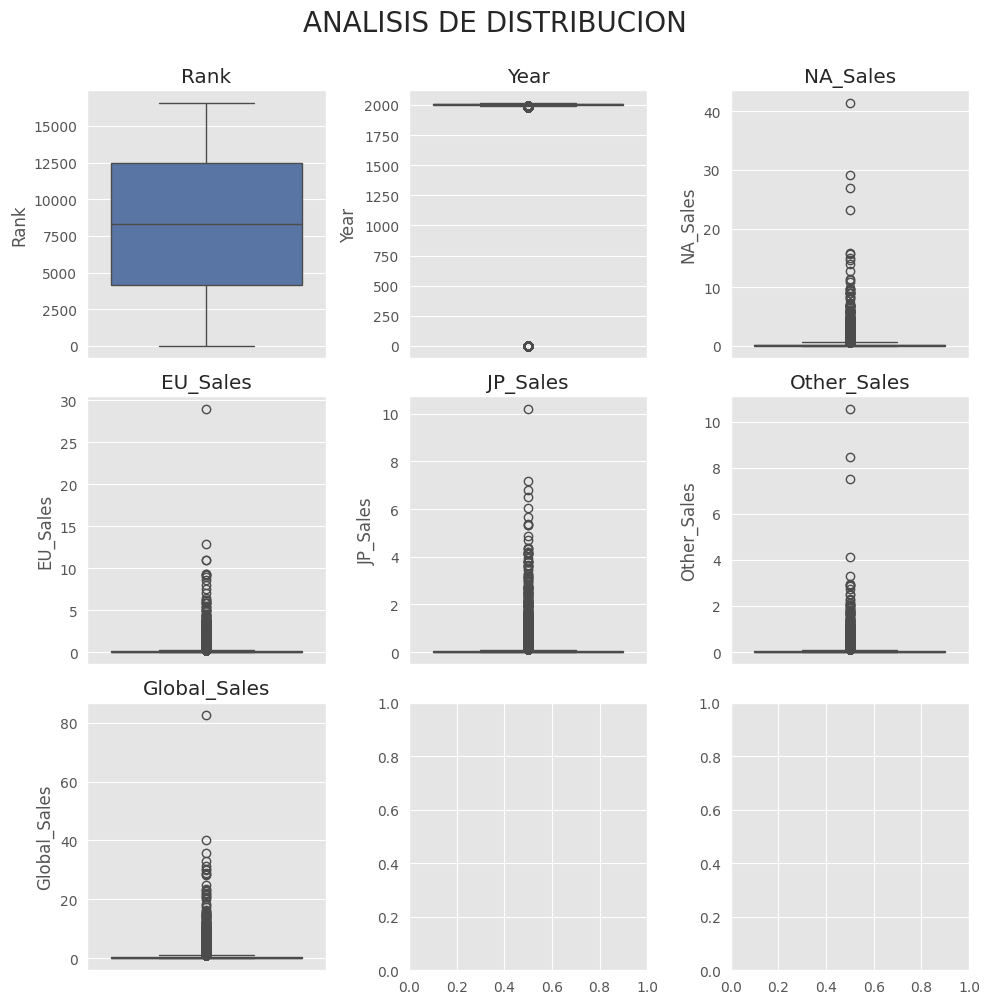

In [92]:
int_cols = df.select_dtypes(exclude = 'object').columns

nrows = 3
nplots = len(int_cols)
cols = nplots // nrows + (nplots % nrows > 0)

fig, axs = plt.subplots(nrows = nrows, ncols = cols, figsize = (10,10))
fig.suptitle('ANALISIS DE DISTRIBUCION', fontsize = 20, y = 1.0)

for i, col in enumerate(int_cols):
    ax = axs[i // cols, i % cols] if nrows > 1 else axs[i % cols]
    sns.boxplot(data = df, y = col, ax = ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

Para el tema del año se sobreentiende que lo considere como un outlier, pero segun lo explicado líneas arriba, podemos saber con claridad que es un valor que se le brindó al videojuego por tener valores nulos.

# HALLAMOS LA CORRELACION

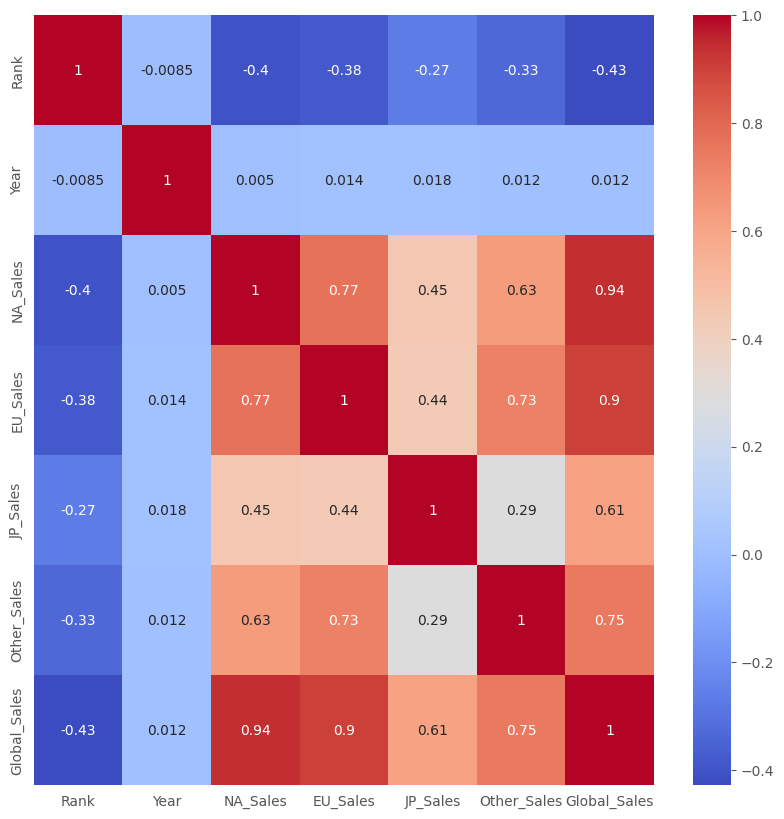

In [93]:
plt.figure(figsize= (10,10))
sns.heatmap(data = df[int_cols].corr(), annot= True, cmap= 'coolwarm')
plt.show()

Vemos todo normal, nada fuertemente correlacionado o viceversa, a excepción de las ventas, estas como estan a la par, pues tiene una tendencia de estar muy correlacionada, pero sabemos que es por lo mismo de sus ventas.

# DISTRIBUCION DE VARIABLES CATEGORICAS

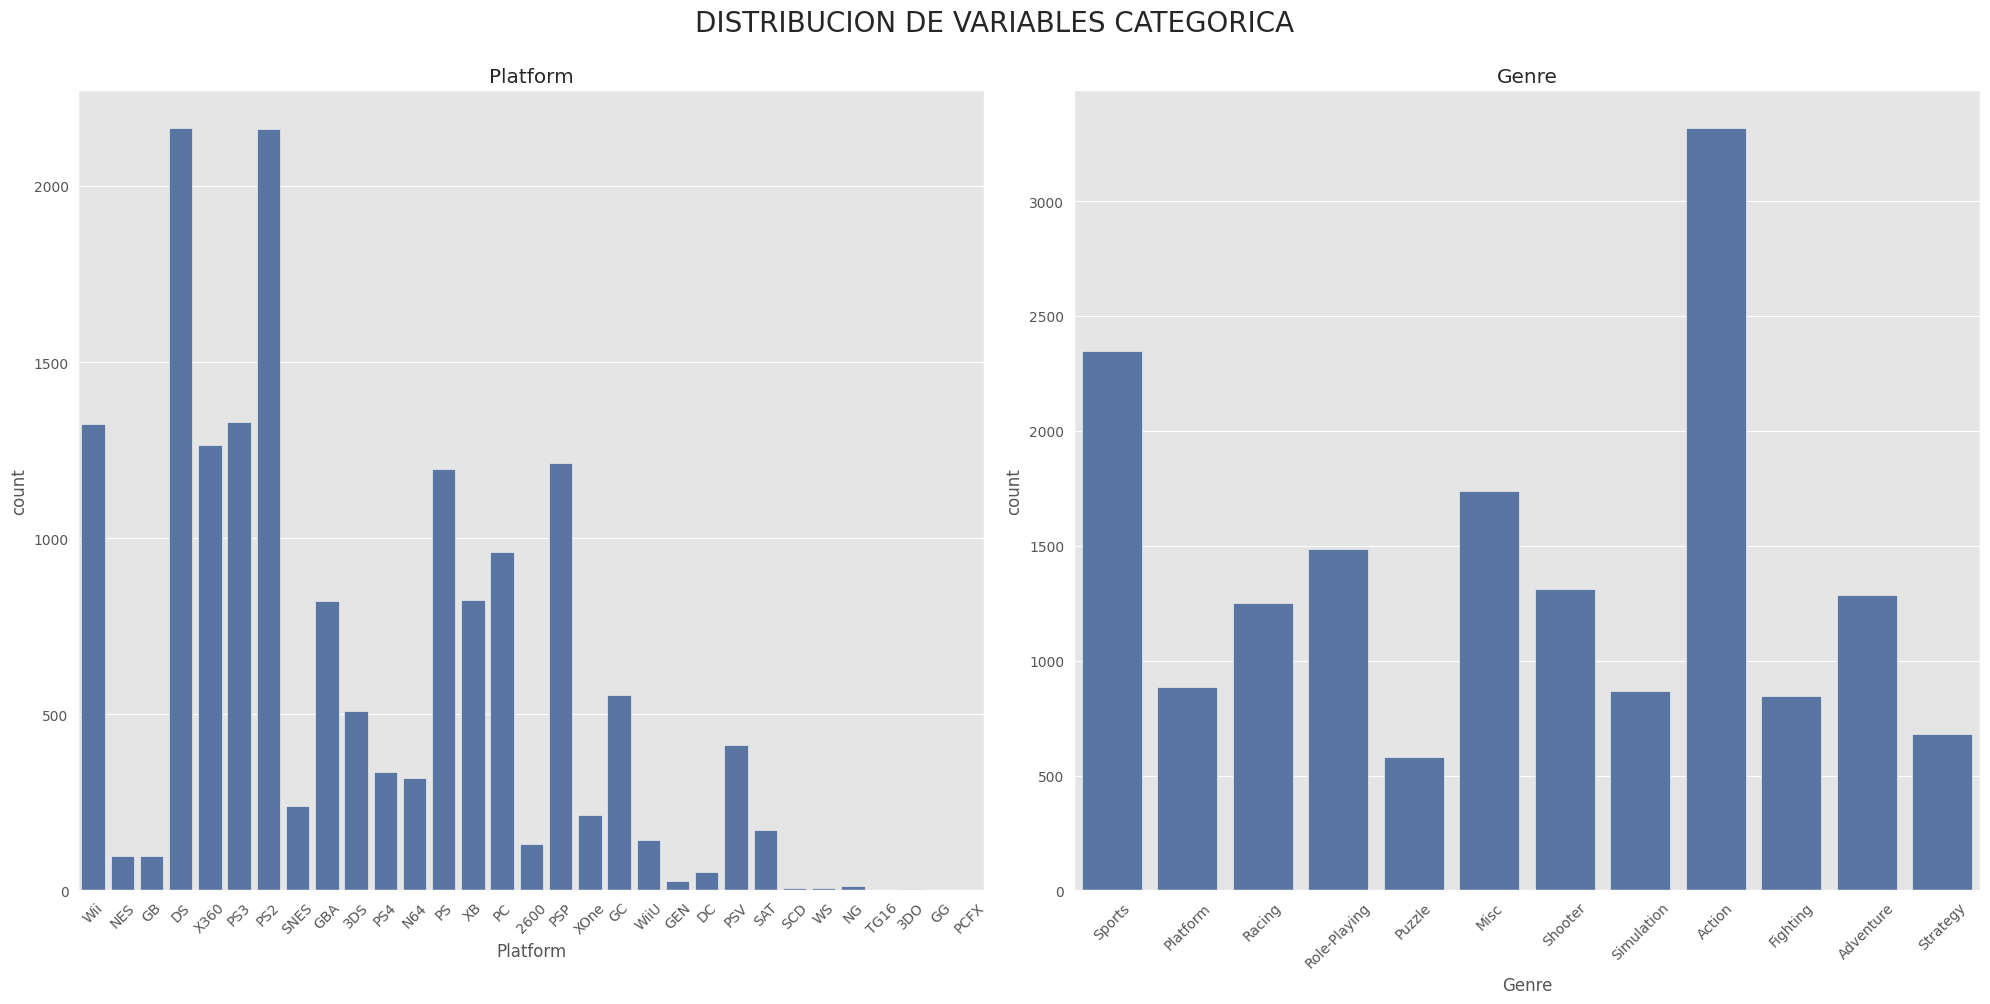

In [94]:
cat_cols = df[['Platform', 'Genre']].columns

nrows = 1
nplots = len(cat_cols)
cols = nplots // nrows + (nplots % nrows > 0)

fig, axs = plt.subplots(nrows = nrows, ncols = cols, figsize = (20,10))
fig.suptitle('DISTRIBUCION DE VARIABLES CATEGORICA', fontsize = 20, y = 1.0)

for i, col in enumerate(cat_cols):
    ax = axs[i // cols, i % cols] if nrows > 1 else axs[i % cols]
    sns.countplot(data = df, x = col, ax = ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# DISTRIBUCION DE VARIABLES CATEGORICAS POR GENERO DE JUEGO

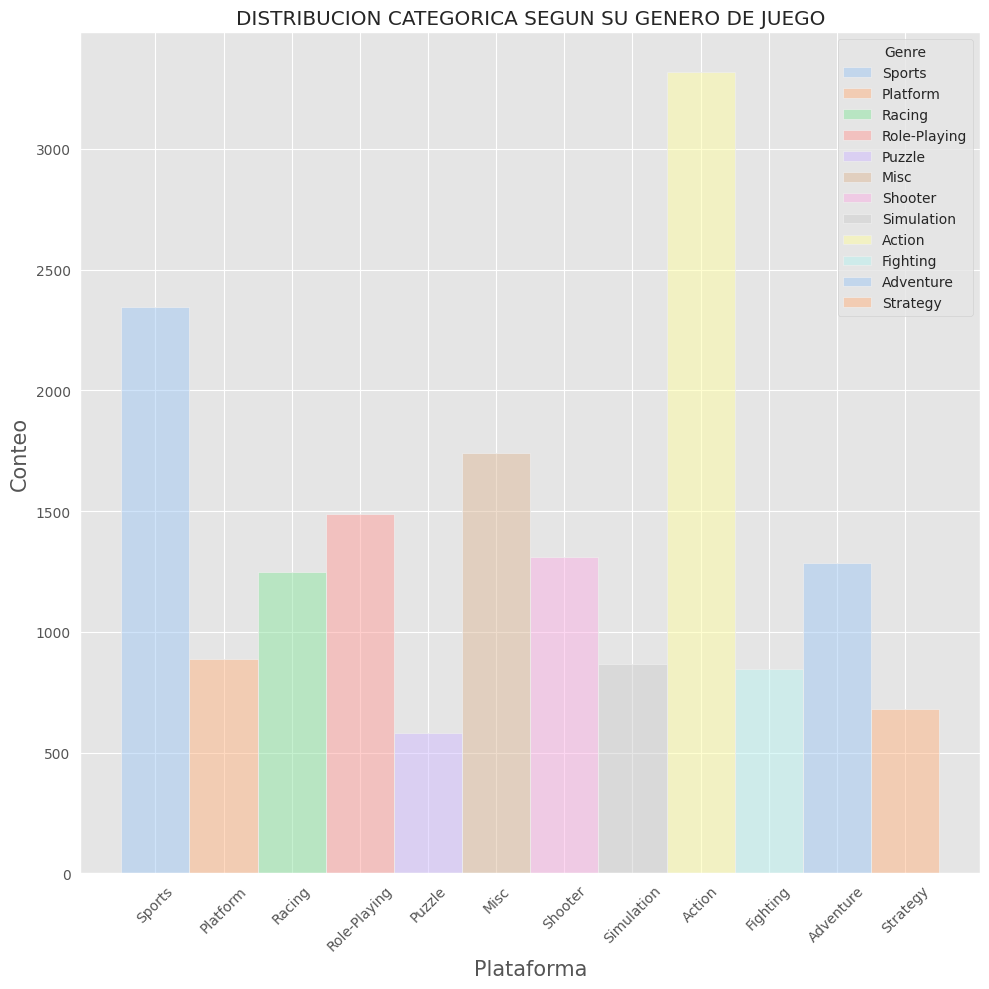

In [95]:
cat_cols = df[['Platform']].columns

plt.figure(figsize= (10,10))
sns.histplot(data= df, x = col, hue = 'Genre', palette= 'pastel')
plt.xticks(rotation = 45)
plt.title('DISTRIBUCION CATEGORICA SEGUN SU GENERO DE JUEGO')
plt.xlabel('Plataforma', fontsize = 15)
plt.ylabel('Conteo', fontsize = 15)
plt.tight_layout()
plt.show()

# DISTRIBUCION DE VARIABLES NUMERICAS

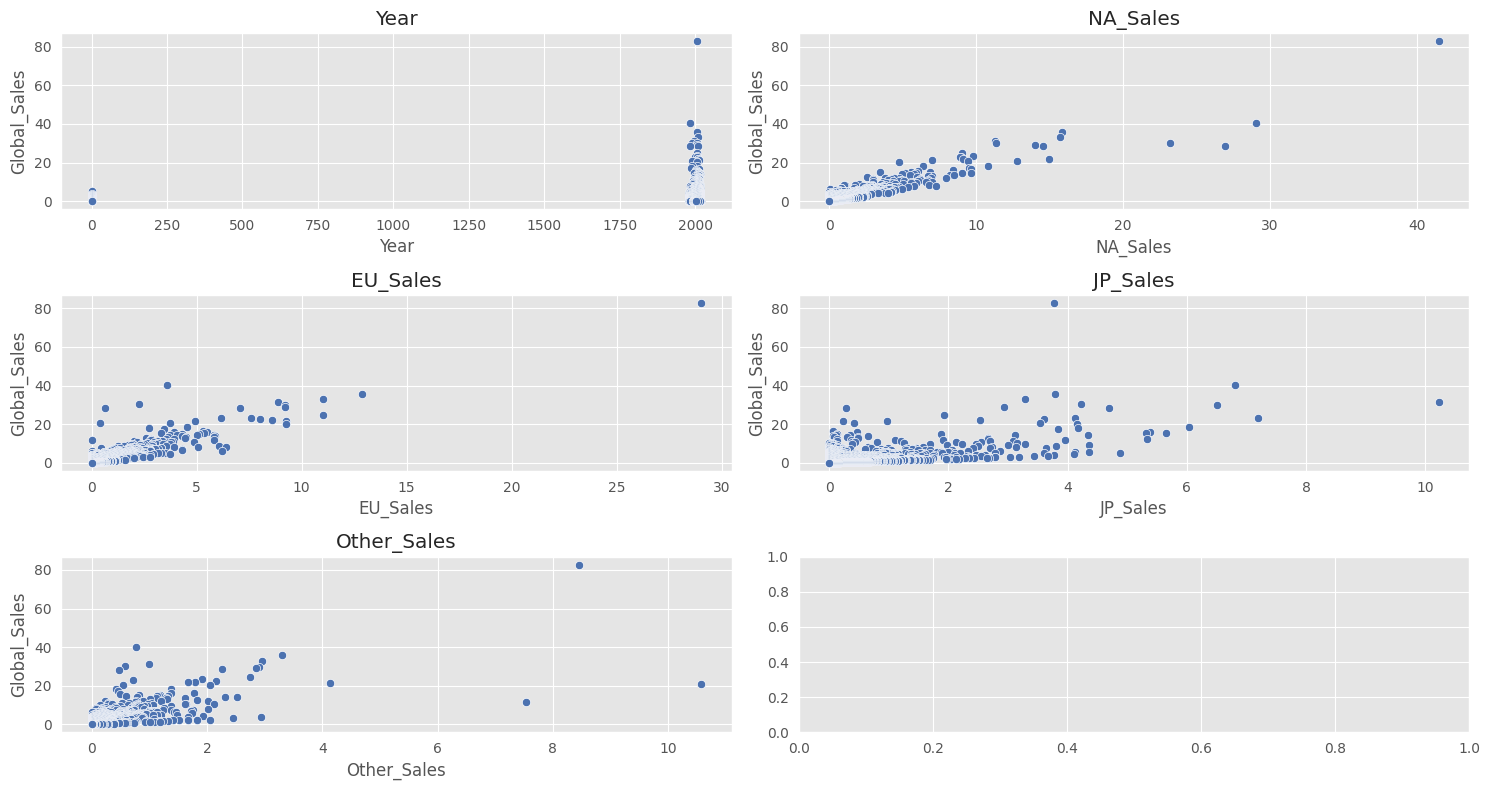

In [96]:
var_num = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].columns

nrows = 3
nplots = len(var_num)
cols = nplots // nrows + (nplots % nrows > 0)
fig , axs = plt.subplots(nrows= nrows, ncols= cols, figsize = (15,8))

for i, col in enumerate(var_num):
    ax = axs[i // cols, i % cols] if nrows > 1 else axs[i % cols]
    sns.scatterplot(data = df, x = col, y = 'Global_Sales', ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

# DISTRIBUCION DE VARIABLES NUMERICAS SEGUN SU GENERO

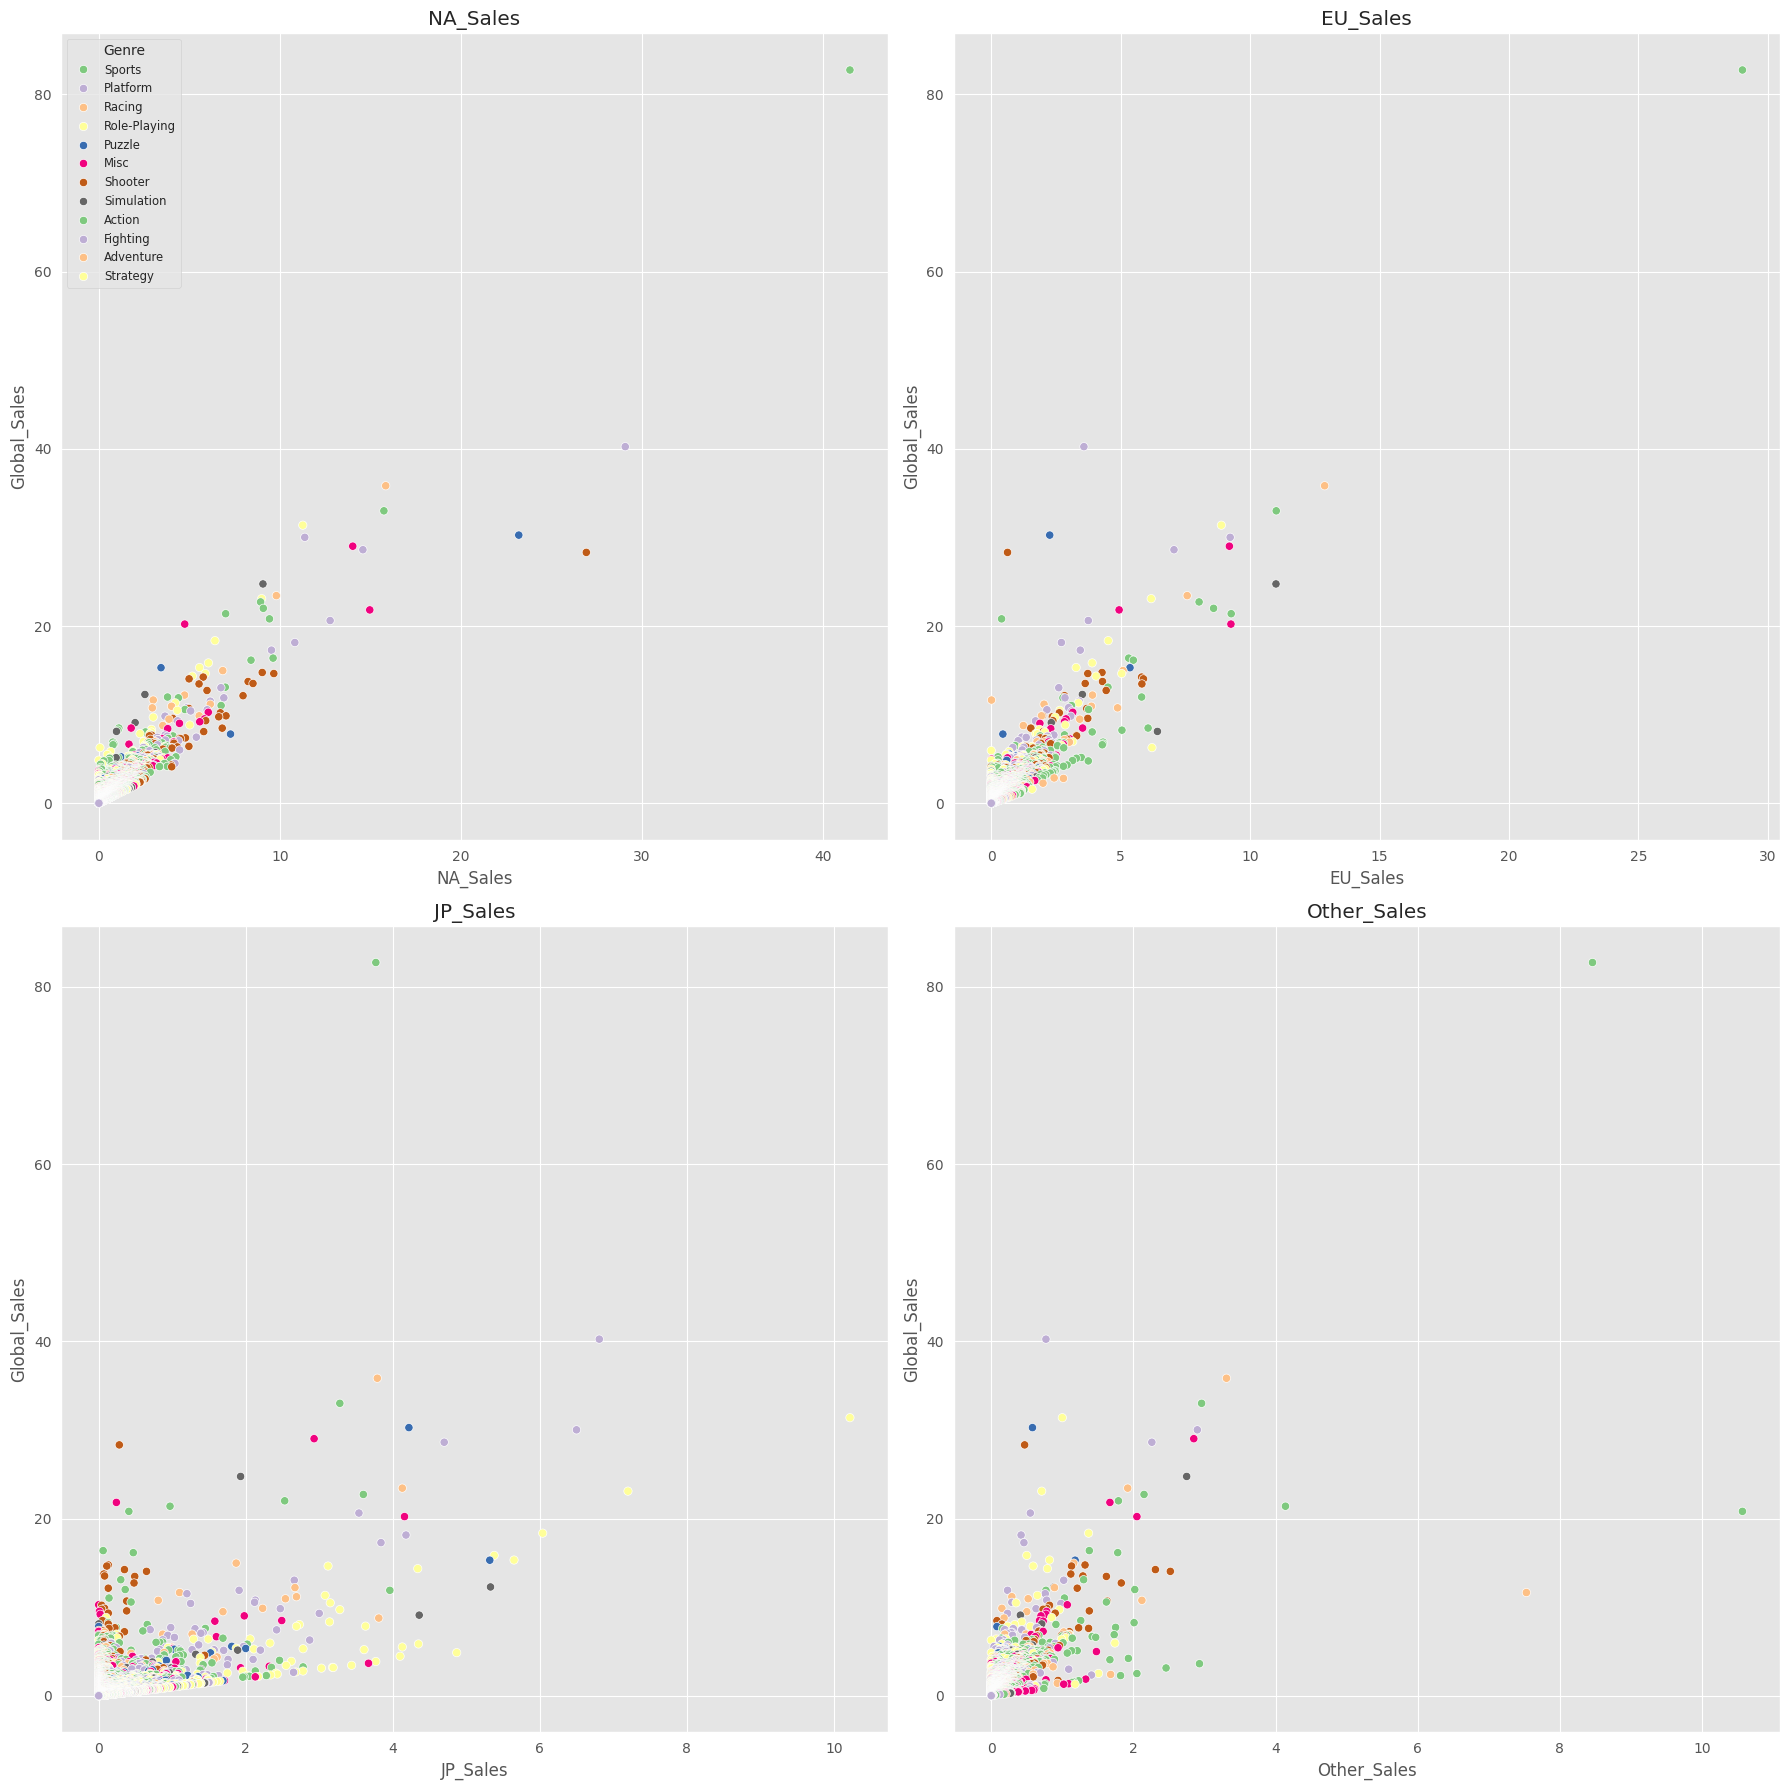

In [97]:
var_num = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].columns

nrows = 2
nplots = len(var_num)
cols = nplots // nrows + (nplots % nrows > 0)
fig, axs = plt.subplots(nrows=nrows, ncols=cols, figsize=(18,18))

for i, col in enumerate(var_num):
    ax = axs[i // cols, i % cols] if nrows > 1 else axs[i % cols]
    sns.scatterplot(data=df, x=col, y='Global_Sales', ax=ax, hue='Genre', palette='Accent')
    ax.set_title(col)
    if i == 0:
        legend = ax.legend(loc='best', fontsize='small', title='Genre')
    else:
        ax.legend([],[], frameon=False)

plt.tight_layout()
plt.show()


Para la distribución de las variables numéricas hemos realizado un gráfico de scatterplot por la magnitud de sus valores, para poder visualizarlo de una manera mas ordenado y legible.

Lo que hemos visto es que el género que más ha sido repetido es el de Action, eso será otro tema para poder revisarlo.

# ANALISIS ESPECIFICO PARA RESPONDER NUESTRAS PREGUNTAS

Luego de realizar un analisis para nuestras variables tanto categóricas como numéricas, nos hemos percatado que el pique del juego mas vendido fu El de nintendo del genero 'Sports', pero eso no quiere decir que este genero sea el mas vendido en las disitintas zona geográficas. Esto fácilmente podemos resolverlo en el analisis de la distribución categórica filtrado por el género de juego.

Ahi podemos apreciar que el género de acción es el que mas ventas ha obtenido ha nivel global de ventas. Dicho esto, nuestra tarea será el de comprobar lo mencionado lineas arriba como el de crear tablas de contingencia para poder comprobar y resolver nuestras preguntas.

Pregunta: ¿Qué zona geográfica vendió más videojuegos?

In [98]:
cont_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
cont_sales.columns = ['Region', 'Total']
cont_sales['Total'] = cont_sales['Total'].round(2)
cont_sales

,Region,Total
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


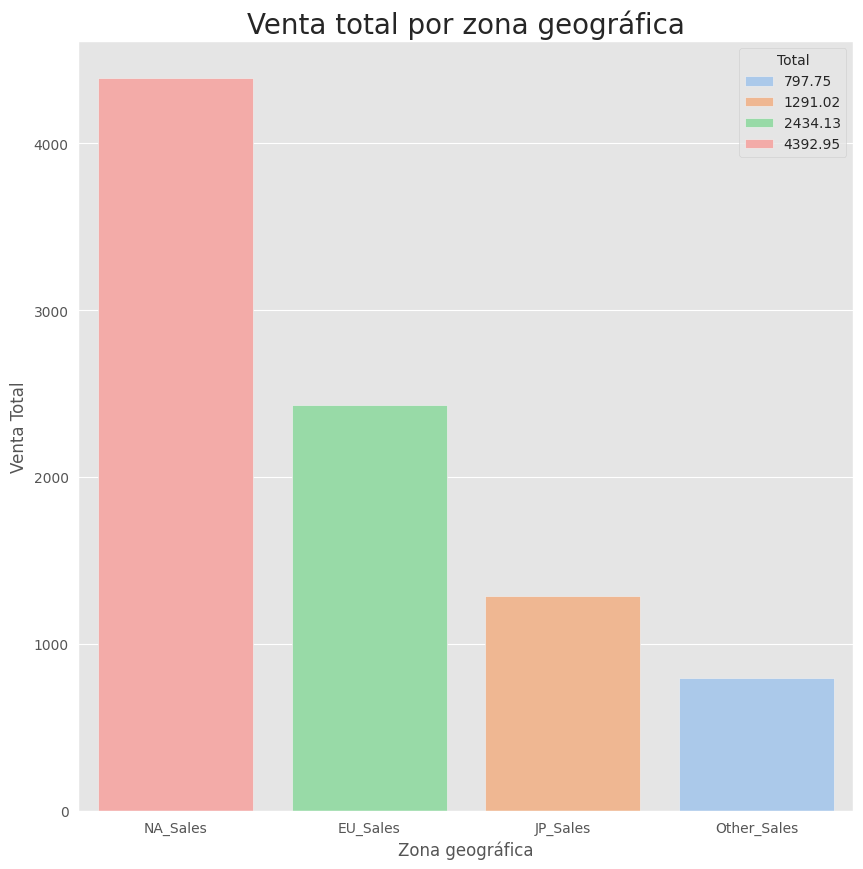

In [99]:
plt.figure(figsize=(10, 10))
sns.barplot(data=cont_sales, x='Region', y='Total', palette='pastel', hue= 'Total')
plt.title('Venta total por zona geográfica', fontsize =20, y = 1.0)
plt.ylabel('Venta Total')
plt.xlabel('Zona geográfica')
plt.show()

Pregunta: ¿Qué género fue el más vendido?

In [100]:
cont_gen = df.groupby('Genre')['Global_Sales'].sum().reset_index()
cont_gen['Percent'] = cont_gen['Global_Sales']/cont_gen['Global_Sales'].sum()
cont_gen['Percent'] = cont_gen['Percent'].round(2)
cont_gen = cont_gen.sort_values(by = 'Global_Sales',ascending= False)
cont_gen

,Genre,Global_Sales,Percent
0,Action,1750.16,0.20
10,Sports,1330.54,0.15
8,Shooter,1036.84,0.12
7,Role-Playing,927.26,0.10
4,Platform,831.04,0.09
3,Misc,809.30,0.09
6,Racing,731.77,0.08
2,Fighting,448.94,0.05
9,Simulation,391.91,0.04
5,Puzzle,244.42,0.03


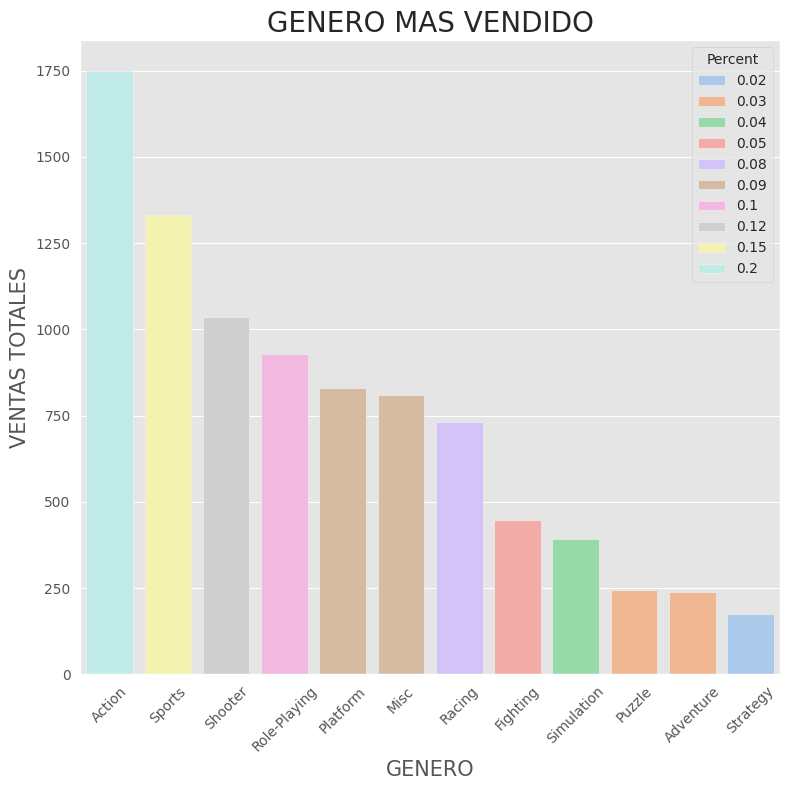

In [101]:
plt.figure(figsize= (8,8))
sns.barplot(data = cont_gen, x = 'Genre', y = 'Global_Sales', hue = 'Percent', palette= 'pastel')
plt.title('GENERO MAS VENDIDO', fontsize = 20, y = 1.0)
plt.xlabel('GENERO', fontsize = 15)
plt.ylabel('VENTAS TOTALES', fontsize = 15)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Pregunta: ¿Cuáles fueron las 5 plataformas mas rentable?

In [102]:
cont_plat = df.groupby('Platform')['Global_Sales'].sum().reset_index()
cont_plat['Percent'] = cont_plat['Global_Sales']/cont_plat['Global_Sales'].sum()
cont_plat['Percent'] = cont_plat['Percent'].round(2)
cont_plat = cont_plat.sort_values(by = 'Global_Sales', ascending= False).head(5)
cont_plat

,Platform,Global_Sales,Percent
16,PS2,1255.77,0.14
28,X360,979.60,0.11
17,PS3,957.89,0.11
26,Wii,926.05,0.10
4,DS,821.46,0.09


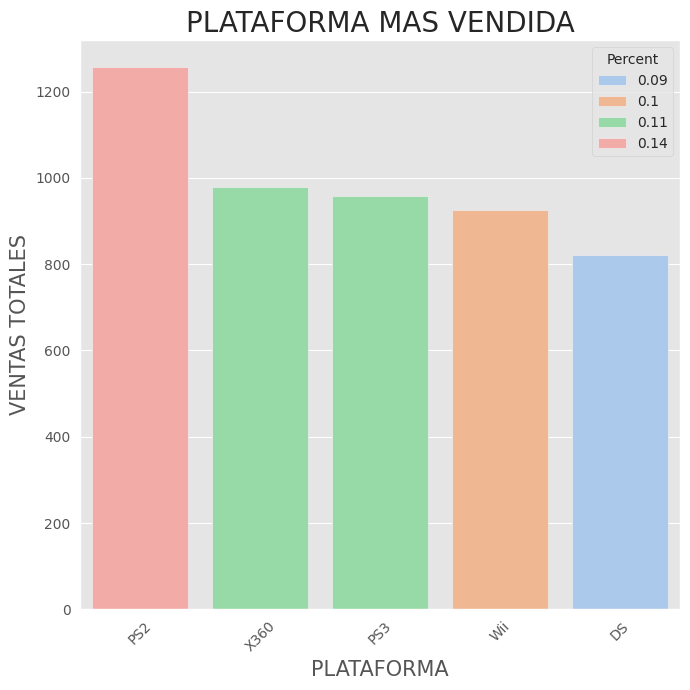

In [103]:
plt.figure(figsize= (7,7))
sns.barplot(data = cont_plat, x = 'Platform', y = 'Global_Sales', hue = 'Percent', palette= 'pastel')
plt.title('PLATAFORMA MAS VENDIDA', fontsize = 20, y = 1.0)
plt.xlabel('PLATAFORMA', fontsize = 15)
plt.ylabel('VENTAS TOTALES', fontsize = 15)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Pregunta: ¿Qué empresa tuvo mayor participación en el mercado?

In [104]:
cont_pub = df.groupby('Publisher')['Global_Sales'].sum().reset_index()
cont_pub['Percent'] = cont_pub['Global_Sales']/cont_pub['Global_Sales'].sum()
cont_pub['Percent'] = cont_pub['Percent'].round(2)
cont_pub = cont_pub.sort_values(by = 'Global_Sales', ascending= False)
cont_pub = cont_pub.head()
cont_pub

,Publisher,Global_Sales,Percent
359,Nintendo,1786.36,0.20
138,Electronic Arts,1110.15,0.12
21,Activision,727.11,0.08
456,Sony Computer Entertainment,607.49,0.07
525,Ubisoft,474.51,0.05


<Figure size 1000x1000 with 0 Axes>

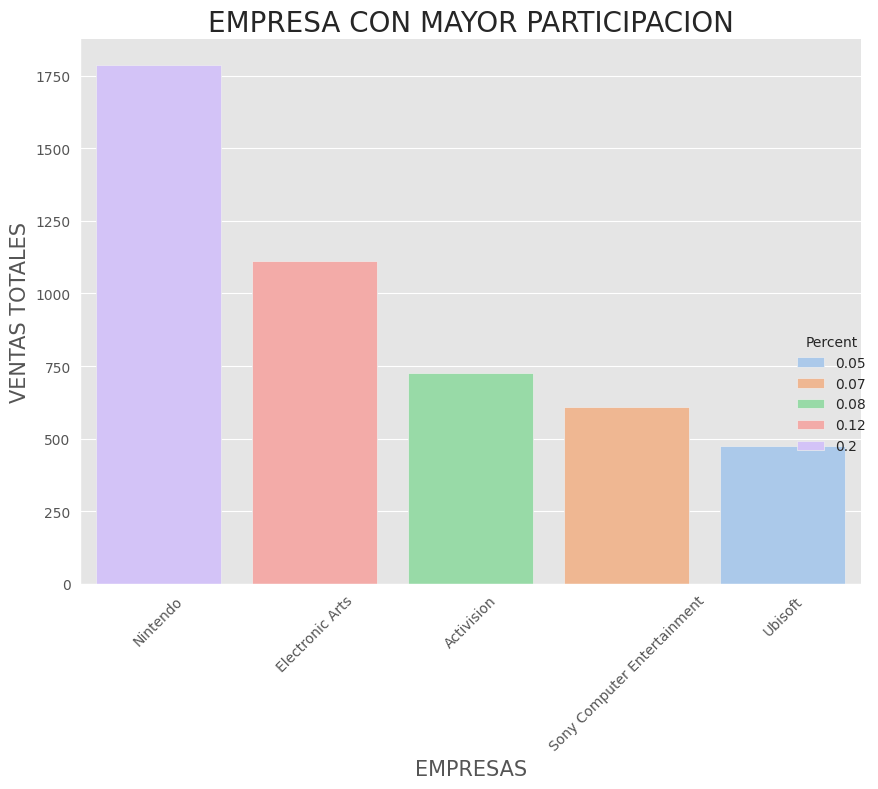

In [105]:
plt.figure(figsize= (10,10))
sns.catplot(kind= 'bar', data = cont_pub, x = 'Publisher', y = 'Global_Sales', hue = 'Percent', palette= 'pastel', height= 8)
plt.title('EMPRESA CON MAYOR PARTICIPACION', fontsize = 20, y = 1.0)
plt.xlabel('EMPRESAS', fontsize = 15)
plt.ylabel('VENTAS TOTALES', fontsize = 15)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Con estos gráficos, varias de nuestras preguntas estan siendo contestadas, más una inquietud que tengo es el filtrado pero no por un totalizado como se esta evidenciando sino por la zona geográficas que hay.

Con esto dicho podemos realizar más gráficos pero con el filtrado de zonas geográficas, esto para entender mejor si hay una zona que predomina en el tema de ventas de videojuego; ya que esto seria muy importante a evaluar porque podemos deducir una variable de importancia, la cual sera de mucha ayuda para las futuras proyeccion de venta.

# EMPRESAS CON MAYOR PARTICIPACION SEGUN SU ZONA GEOGRAFICA

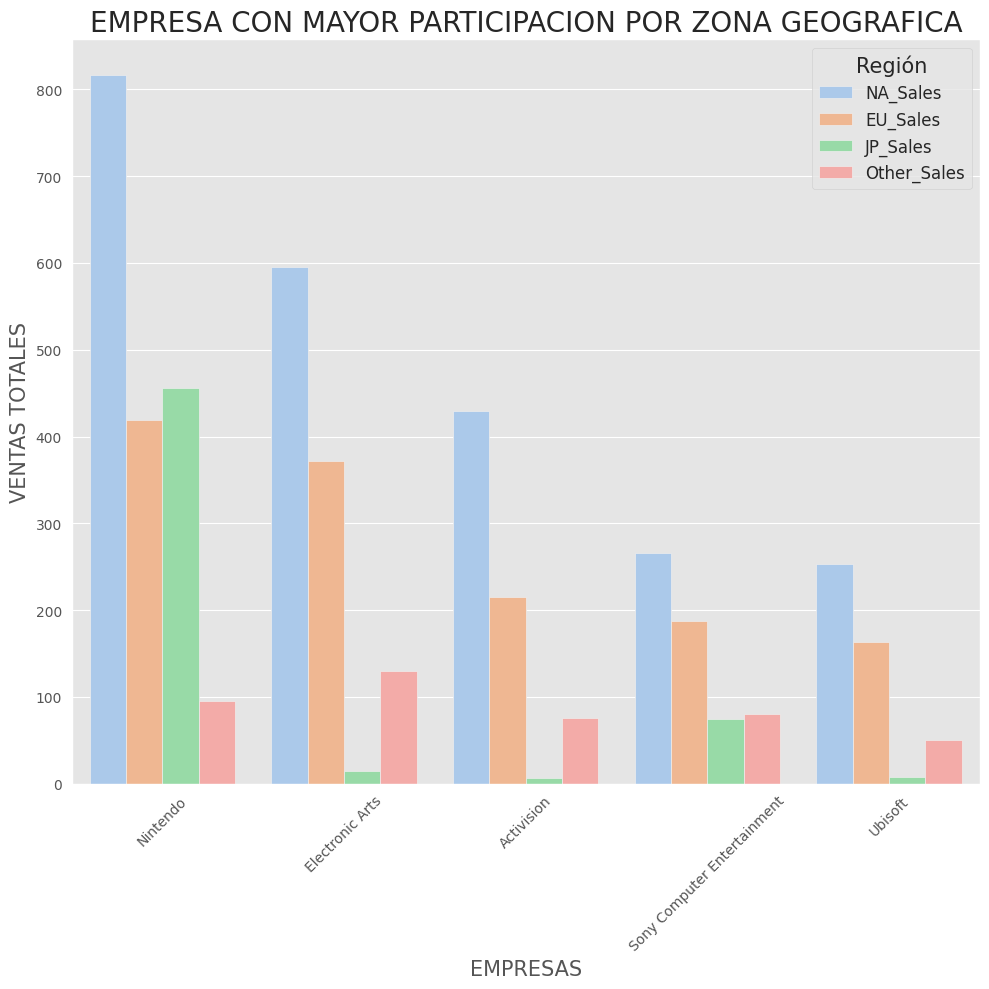

In [106]:
cont_pub_na = df.groupby('Publisher')['NA_Sales'].sum().reset_index()
cont_pub_eu = df.groupby('Publisher')['EU_Sales'].sum().reset_index()
cont_pub_jp = df.groupby('Publisher')['JP_Sales'].sum().reset_index()
cont_pub_other = df.groupby('Publisher')['Other_Sales'].sum().reset_index()

cont_pub_na.columns = ['Publisher', 'NA_Sales']
cont_pub_eu.columns = ['Publisher', 'EU_Sales']
cont_pub_jp.columns = ['Publisher', 'JP_Sales']
cont_pub_other.columns = ['Publisher', 'Other_Sales']

cont_pub = pd.merge(cont_pub_na, cont_pub_eu, on='Publisher')
cont_pub = pd.merge(cont_pub, cont_pub_jp, on='Publisher')
cont_pub = pd.merge(cont_pub, cont_pub_other, on='Publisher')

cont_pub['Global_Sales'] = cont_pub[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
cont_pub['Percent_NA'] = cont_pub['NA_Sales'] / cont_pub['Global_Sales']
cont_pub['Percent_EU'] = cont_pub['EU_Sales'] / cont_pub['Global_Sales']
cont_pub['Percent_JP'] = cont_pub['JP_Sales'] / cont_pub['Global_Sales']
cont_pub['Percent_Other'] = cont_pub['Other_Sales'] / cont_pub['Global_Sales']

cont_pub[['Percent_NA', 'Percent_EU', 'Percent_JP', 'Percent_Other']] = cont_pub[['Percent_NA', 'Percent_EU', 'Percent_JP', 'Percent_Other']].round(2)

cont_pub = cont_pub.sort_values(by='Global_Sales', ascending=False).head()

cont_pub_melted = cont_pub.melt(id_vars='Publisher', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Region', value_name='Sales')

plt.figure(figsize=(10, 10))
sns.barplot(data=cont_pub_melted, x='Publisher', y='Sales', hue='Region', palette='pastel')
plt.title('EMPRESA CON MAYOR PARTICIPACION POR ZONA GEOGRAFICA', fontsize=20, y=1.0)
plt.xlabel('EMPRESAS', fontsize=15)
plt.ylabel('VENTAS TOTALES', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Región', title_fontsize=15, fontsize=12)
plt.tight_layout()
plt.show()


# PLATAFORMAS MAS VENDIDAS SEGUN SU ZONA GEOGRAFICA

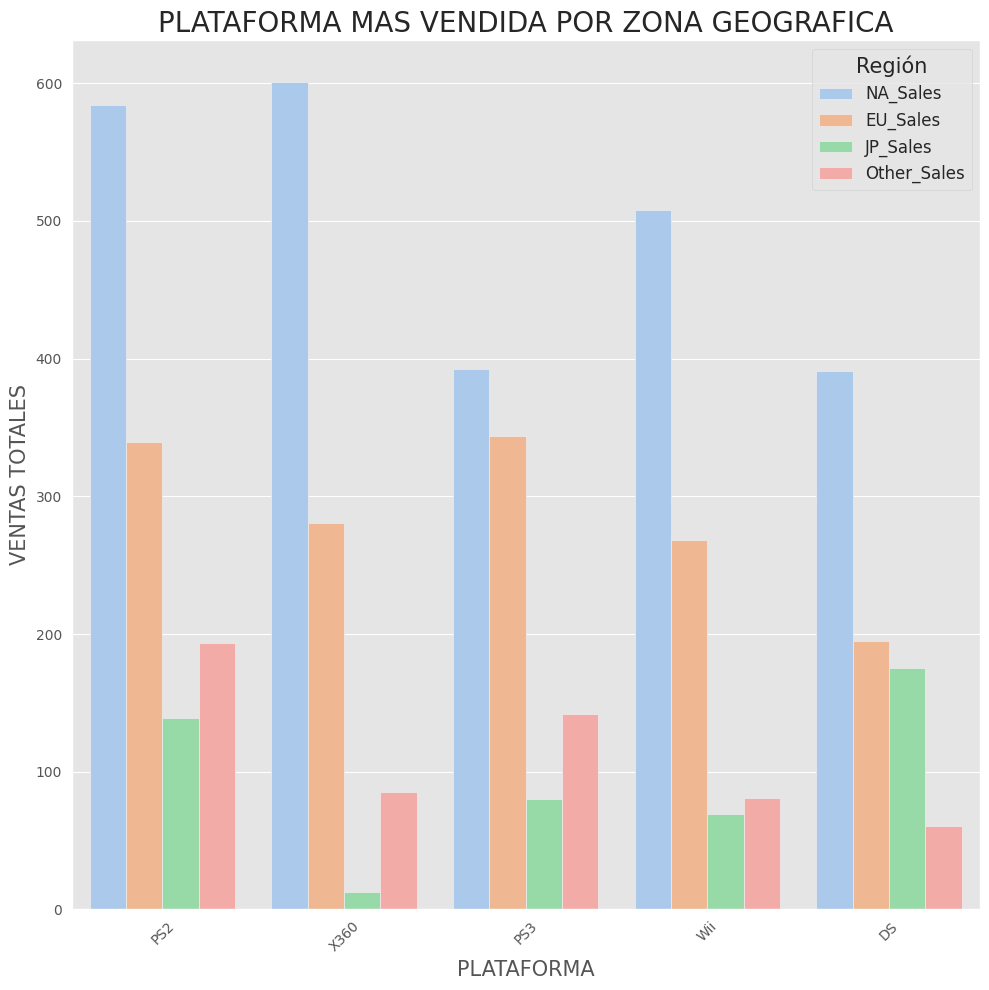

In [107]:
cont_pub_na = df.groupby('Platform')['NA_Sales'].sum().reset_index()
cont_pub_eu = df.groupby('Platform')['EU_Sales'].sum().reset_index()
cont_pub_jp = df.groupby('Platform')['JP_Sales'].sum().reset_index()
cont_pub_other = df.groupby('Platform')['Other_Sales'].sum().reset_index()

cont_pub_na.columns = ['Platform', 'NA_Sales']
cont_pub_eu.columns = ['Platform', 'EU_Sales']
cont_pub_jp.columns = ['Platform', 'JP_Sales']
cont_pub_other.columns = ['Platform', 'Other_Sales']

cont_pub = pd.merge(cont_pub_na, cont_pub_eu, on='Platform')
cont_pub = pd.merge(cont_pub, cont_pub_jp, on='Platform')
cont_pub = pd.merge(cont_pub, cont_pub_other, on='Platform')

cont_pub['Global_Sales'] = cont_pub[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
cont_pub['Percent_NA'] = cont_pub['NA_Sales'] / cont_pub['Global_Sales']
cont_pub['Percent_EU'] = cont_pub['EU_Sales'] / cont_pub['Global_Sales']
cont_pub['Percent_JP'] = cont_pub['JP_Sales'] / cont_pub['Global_Sales']
cont_pub['Percent_Other'] = cont_pub['Other_Sales'] / cont_pub['Global_Sales']

cont_pub[['Percent_NA', 'Percent_EU', 'Percent_JP', 'Percent_Other']] = cont_pub[['Percent_NA', 'Percent_EU', 'Percent_JP', 'Percent_Other']].round(2)

cont_pub = cont_pub.sort_values(by='Global_Sales', ascending=False).head()

cont_pub_melted = cont_pub.melt(id_vars='Platform', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Region', value_name='Sales')

plt.figure(figsize=(10, 10))
sns.barplot(data=cont_pub_melted, x='Platform', y='Sales', hue='Region', palette='pastel')
plt.title('PLATAFORMA MAS VENDIDA POR ZONA GEOGRAFICA', fontsize=20, y=1.0)
plt.xlabel('PLATAFORMA', fontsize=15)
plt.ylabel('VENTAS TOTALES', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Región', title_fontsize=15, fontsize=12)
plt.tight_layout()
plt.show()


  Hay una empresa que sus ventas estan alejadas de las demás, esto me causa curiosidad, y por lo cual tambien quiero saber el genero de 'Nintendo' más vendido.

  Esto es muy beneficios saber; puesto que, el genero mas vendido, tambien llega a ser el mas rentable, el cual se puede sacar mas beneficio.

In [108]:
df_c2 = df[df['Publisher'] == 'Nintendo']
cont_nintendo = df_c2.groupby('Genre')['Global_Sales'].sum().reset_index()
cont_nintendo = cont_nintendo.sort_values(by = 'Global_Sales', ascending=False)
cont_nintendo['Percent'] = cont_nintendo['Global_Sales']/(cont_nintendo['Global_Sales'].sum())
cont_nintendo['Percent'] = cont_nintendo['Percent'].round(2)
cont_nintendo

,Genre,Global_Sales,Percent
4,Platform,427.18,0.24
7,Role-Playing,284.86,0.16
10,Sports,218.00,0.12
3,Misc,180.63,0.10
6,Racing,151.33,0.08
0,Action,128.23,0.07
5,Puzzle,124.78,0.07
9,Simulation,85.28,0.05
8,Shooter,69.70,0.04
2,Fighting,53.33,0.03


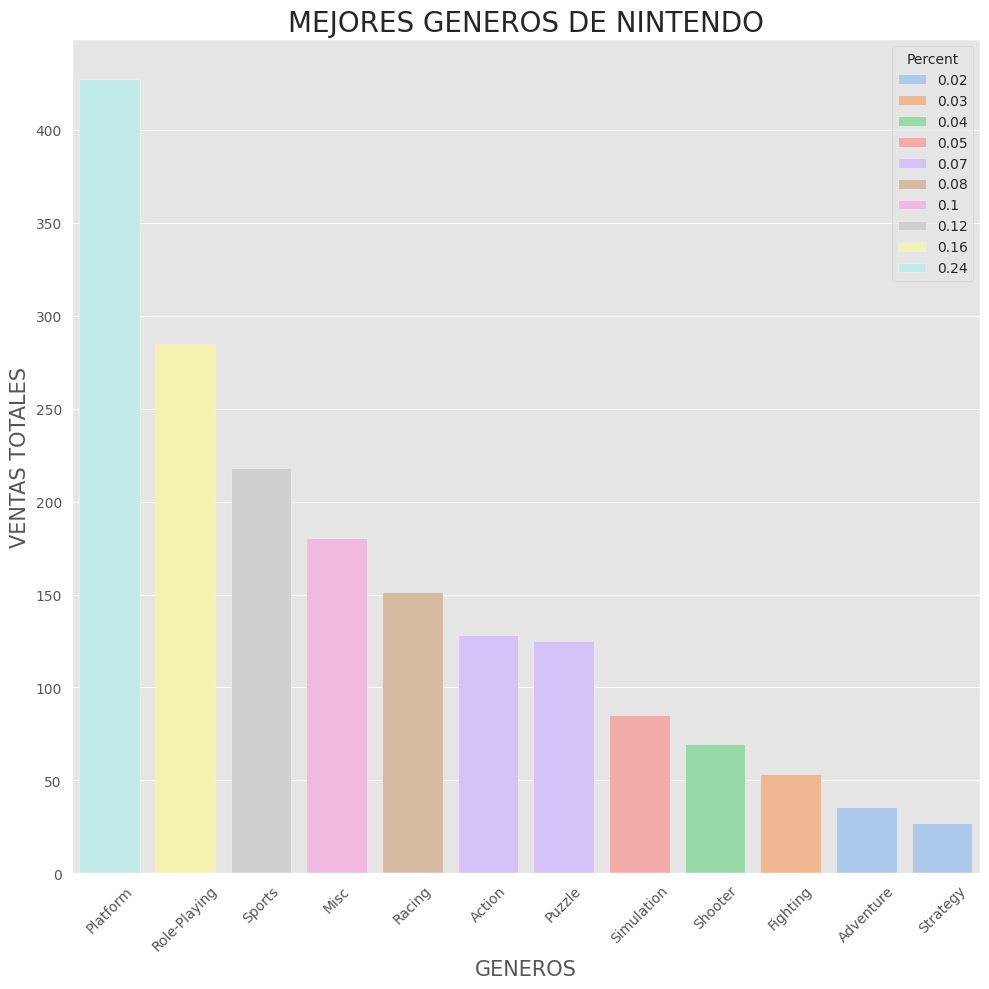

In [109]:
plt.figure(figsize= (10,10))
sns.barplot(data = cont_nintendo, x = 'Genre', y = 'Global_Sales', hue = 'Percent', palette= 'pastel')
plt.title('MEJORES GENEROS DE NINTENDO', fontsize = 20, y = 1.0)
plt.xlabel('GENEROS', fontsize = 15)
plt.ylabel('VENTAS TOTALES', fontsize = 15)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# RESPONDAMOS NUESTRAS PREGUNTAS

Con estos gráficos adicionales podemos responder nuestras preguntas.

Pregunta: ¿Qué zona geográfica vendió más videojuegos?

Para esto debemos decir que los datos en las ventas esta en millones. Dicho esto prosigamos con la respuesta, de las zonas geográficas que tenemos la que fue mas rentable es la de 'Norte America' con '4392.95' separando por gran diferencia las demás zonas.

Pregunta: ¿Qué género fue el más vendido?

El género más vendido fue el de acción con una venta de '1750.16' represtando un 20 % de la venta total.

Pregunta: ¿Cuál fue la plataforma mas rentable?

Por historia, ya se sabía la respuesta, con los gráficos solo se reafirmó esto. La 'PS2' es la plataforma mas vendida, pero nos entró una nueva duda, ¿será esta plataforma mas vendida para todas las zonas geográficas? Pues si, esto se demostró líneas arriba.

Pregunta: ¿Qué empresa tuvo mayor participación en el mercado?

La empresa con mayor participación en el mercado, fue la mítica 'Nintendo', pero así como en la plataforma, nos preguntamos si ¿Esta empresa habra sido las mas vendida en todas las zonas? Nuevamnete la respuesta es si, siendo 'Norte America' la zona con mayor indice de ventas.

Tambien nos preguntamos sobre que genero de 'Nintendo' fue el más vendido, dando como respuesta el género de plataforma, lo cual es contradictorio al género más vendido (Action).

# ENTRENAMIENTO Y TESTEO

Para realizar mi entrenamiento y testeo, primero tengo que conocer mi variable objetivo y ese será si mi videojuego fue rentable o no:

In [110]:
threshold = df['Global_Sales'].median()

df['Success'] = (df['Global_Sales'] > threshold).astype(int)


In [111]:
features = ['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
X = df[features]
y = df['Success']

In [112]:
label_encoders = {}
for column in ['Platform', 'Genre', 'Publisher']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

scaler = StandardScaler()
X[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = scaler.fit_transform(X[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-112-74809d064b23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-112-74809d064b23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-112-74809d064b23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

### Para este caso probaremos los siguientes modelos:

- Regresión Logística
- K-Nearest Neighbors
- Support Vector Machine
- Arbol de decisión
- Random Forest
- Gradient Boosting
- XGBoost

In [113]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
    }

rounded_results = {model: {metric: round(value, 2) for metric, value in metrics.items()} for model, metrics in results.items()}

rounded_results


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': {'Accuracy': 0.95,
  'Precision': 0.97,
  'Recall': 0.93,
  'F1-Score': 0.95},
 'K-Nearest Neighbors': {'Accuracy': 0.74,
  'Precision': 0.74,
  'Recall': 0.73,
  'F1-Score': 0.74},
 'Support Vector Machine': {'Accuracy': 0.5,
  'Precision': 0.7,
  'Recall': 0.0,
  'F1-Score': 0.01},
 'Decision Tree': {'Accuracy': 0.99,
  'Precision': 1.0,
  'Recall': 0.99,
  'F1-Score': 0.99},
 'Random Forest': {'Accuracy': 0.99,
  'Precision': 1.0,
  'Recall': 0.99,
  'F1-Score': 0.99},
 'Gradient Boosting': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 0.99,
  'F1-Score': 1.0},
 'XGBoost': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-Score': 1.0}}

# HIPERPARAMETROS

In [114]:
scorer = make_scorer(f1_score, average='weighted')

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Inicializar los modelos
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Configurar GridSearchCV para cada modelo
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring=scorer, cv=5, n_jobs=-1, verbose=2)
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, scoring=scorer, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring=scorer, cv=5, n_jobs=-1, verbose=2)

# Entrenar GridSearchCV para cada modelo
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

# Obtener los mejores parámetros y modelos
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Best Gradient Boosting Parameters:", grid_search_gb.best_params_)
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)

# Evaluar los mejores modelos en el conjunto de prueba
from sklearn.metrics import classification_report

y_pred_rf = best_rf.predict(X_test)
y_pred_gb = best_gb.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))

print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, y_pred_gb))

print("XGBoost Classifier Report:")
print(classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1663
           1       0.99      0.99      0.99      1657

    accuracy                           0.99      3320
   macro avg       0.99      0.99      0.99      3320
weighted avg       0.99      0.99      0.99      3320

Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1663
           1       1.00      0.9

# VALIDACION CRUZADA

In [115]:
# Evaluar el modelo Random Forest
scores_rf = cross_val_score(best_rf, X, y, cv=5, scoring='f1_weighted')
mean_rf = round(scores_rf.mean(), 2)
std_rf = round(scores_rf.std(), 2)
print("Random Forest CV F1-Score: \n", mean_rf, '\n', std_rf)

# Evaluar el modelo Gradient Boosting
scores_gb = cross_val_score(best_gb, X, y, cv=5, scoring='f1_weighted')
mean_gb = round(scores_gb.mean(), 2)
std_gb = round(scores_gb.std(), 2)
print("Gradient Boosting CV F1-Score: \n", mean_gb, '\n',std_gb)

# Evaluar el modelo XGBoost
scores_xgb = cross_val_score(best_xgb, X, y, cv=5, scoring='f1_weighted')
mean_xgb = round(scores_xgb.mean(), 2)
std_xgb = round(scores_xgb.std(), 2)
print("XGBoost CV F1-Score: \n", mean_xgb, '\n',std_xgb)


Random Forest CV F1-Score: 
 0.89 
 0.15
Gradient Boosting CV F1-Score: 
 0.89 
 0.13
XGBoost CV F1-Score: 
 0.89 
 0.14


# FEATURES MAS IMPORTANTES

In [125]:
feature_importances = best_gb.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


       Feature  Importance
4     NA_Sales    0.538434
6     JP_Sales    0.182758
7  Other_Sales    0.149530
5     EU_Sales    0.128906
1         Year    0.000221
3    Publisher    0.000068
0     Platform    0.000065
2        Genre    0.000017


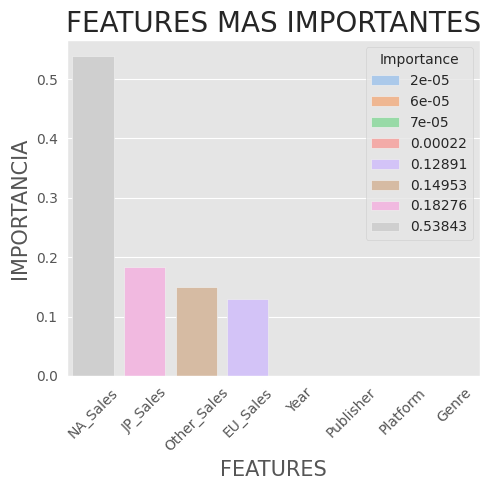

In [127]:
plt.figure(figsize = (5,5))
importance_df = importance_df.round(5)
sns.barplot(data = importance_df, x = 'Feature', y = 'Importance', palette = 'pastel', hue = 'Importance')
plt.title('FEATURES MAS IMPORTANTES', fontsize = 20, y = 1.0)
plt.xlabel('FEATURES', fontsize = 15)
plt.ylabel('IMPORTANCIA', fontsize = 15)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# CONCLUSIONES

El proyecto fue muy divertido; ya que no es ajeno para nadie el tema de los videojuegos y saber mas aun lo mas vendido, podemos asociarlo a juegos de nuestra infancia. Por ello es que para hacer mi entranamiento y testeo fue la de visualizar si aquellos videojuegos tienen exito.

El modelo que mejor puntuación dió fue el de random forest, por ello es el que utilizaremos para nuestras predicciones. Para poder decidirnos por este modelo, tuvimos que realizar hiperparámetro como una revalidación cruzada, esto como se puede apreciar líneas arriba.

En conclusión, de los 7 modelos que hemos puesto a prueba para predecir el éxito de un videojuego, nos decantamos por el de 'random forest', con esto sera de gran ayuda para futuras predicciones, y mas aun si sabemos las variable o características mas importantes. De lo cual, fue la varibale 'NA' que respresenta las ventas de Norte America, esto se pudo deducir desde antes por los gráficos realizados. A partir de esto, la empresas buscarán un mejor planteamiento en cuanto a juegos o géneros lanzado y en que plataforma, así mismo mirar un poco la actualidad porque algunas de estas plataformas ya fueron reemplazadas.
